In [2]:
#  Project karne ka work flow
# 1. import data
# 2.preprocess data
# 3.visulize data
# 4. train test data
# 5 train model and evaluation
# 6 prediction with website

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [4]:
# loading the dataset 
insurance_dataset= pd.read_csv("insurance.csv")

In [5]:
# first five rows
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# checking rows and columns available
insurance_dataset.shape

(1338, 7)

In [7]:
# getting the information of dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# features are age, sex, bmi, children, smoker, region, chrges
# categorial features are sex , smoking, region

In [9]:
# checking missing values
insurance_dataset.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# analysis the data , statistical measures
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

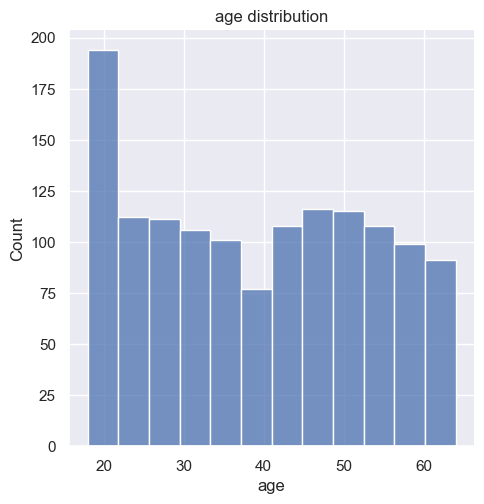

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['age'])
plt.title('age distribution')
plt.show

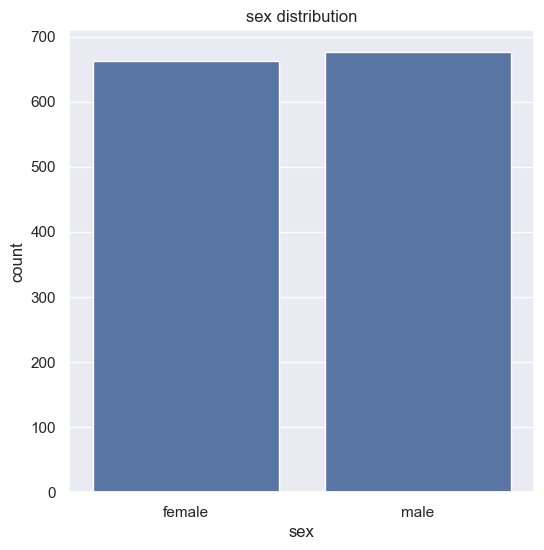

In [12]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data = insurance_dataset)
plt.title('sex distribution')
plt.show()

In [13]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

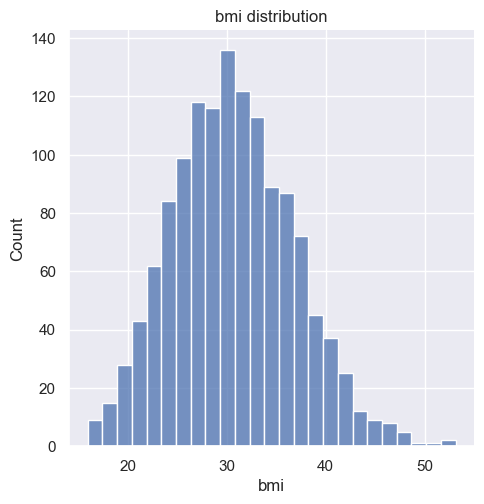

In [14]:
# distribution of bmi
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show

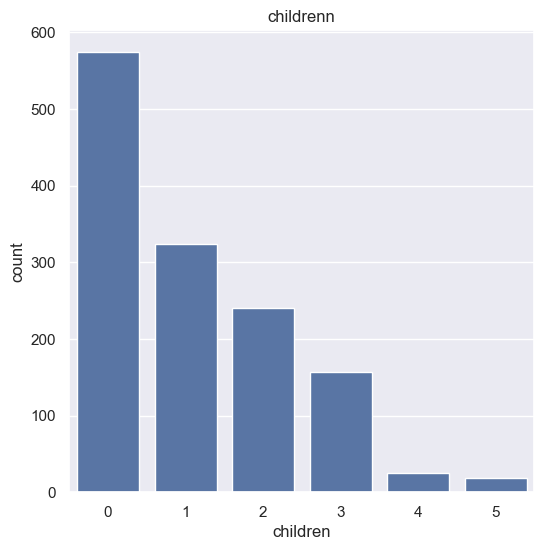

In [15]:
# normal bmi range is 18.5 to 24.9
# under weight below 18.5
# over weight above 24.9
plt.figure(figsize=(6,6))
sns.countplot(x='children', data = insurance_dataset)
plt.title('childrenn')
plt.show()

In [16]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

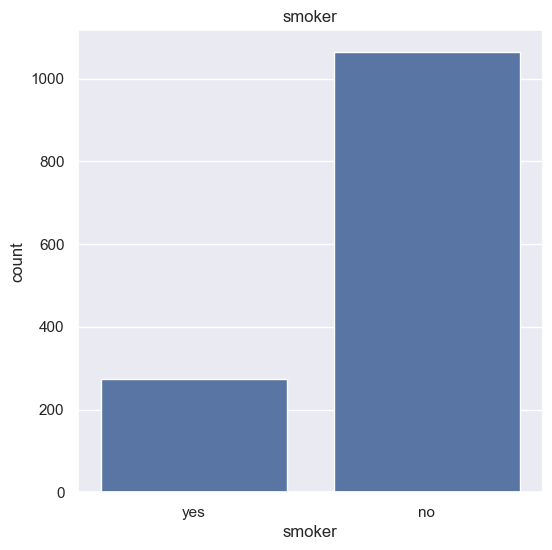

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data = insurance_dataset)
plt.title('smoker')
plt.show()

In [18]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

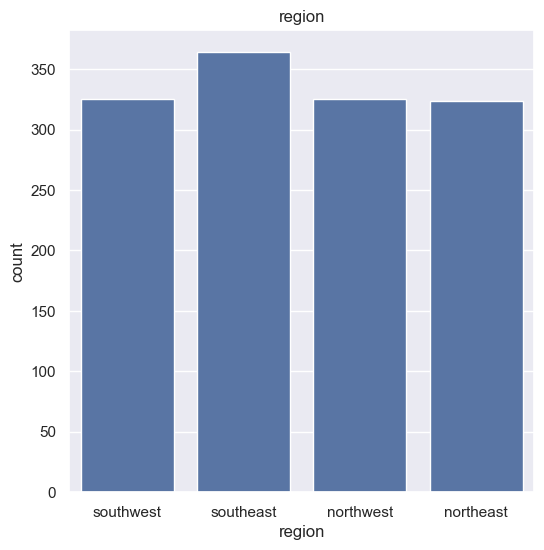

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data = insurance_dataset)
plt.title('region')
plt.show()

In [20]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [21]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

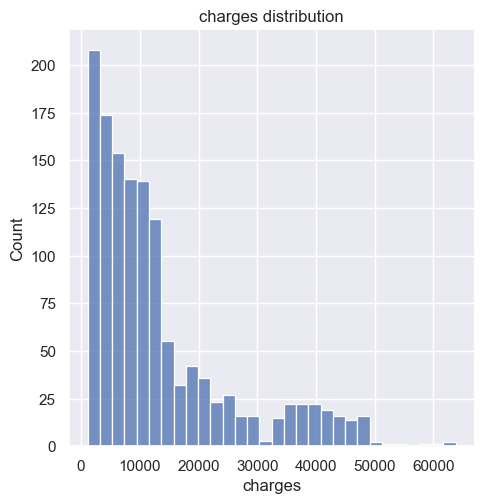

In [22]:
# distribution of charges
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show

In [23]:
# data pre processing
# encoding categorical values sex,smoker,region
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace = True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)


C:\Users\himan\AppData\Local\Temp\ipykernel_4764\1277054279.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace = True)
C:\Users\himan\AppData\Local\Temp\ipykernel_4764\1277054279.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
C:\Users\himan\AppData\Local\Temp\ipykernel_4764\1277054279.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version

In [24]:
# split the data in features and target
# if we remove a column axis =1, or when remove a row axis = 0
X = insurance_dataset.drop(columns='charges', axis = 1)
Y = insurance_dataset['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [25]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
# splitting data into tarina and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state =42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [28]:
# model training our linear_regression
# horizontal = features
# vertical = target

regressor = LinearRegression()




In [29]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [30]:
# model evaluation that is predicting target values using training values
training_data_prediction= regressor.predict(X_train)


In [31]:
# R square value my performance matrics range 0-1
# yaha pe humne compare kar rahe hai hamara aur predicted value ko
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('r square value :',r2_train)


r square value : 0.7413131194887537


In [32]:
# model evaluation that is predicting target values using testing values
training_data_prediction= regressor.predict(X_test)

In [33]:
r2_test = metrics.r2_score(Y_test, training_data_prediction)
print('r square value :',r2_test)

r square value : 0.783021587162344


In [34]:
# Building predicting system
input_data = (20,0,15,0,1,0) 
input_data_as_numpy_array= np.array(input_data)

# reshaping array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print('insurnce value is :',prediction)


insurnce value is : [3760.36712877]


C:\Users\himan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
